In [57]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import torch
# dtype = torch.float
# #device = torch.device("cpu")
# device = torch.device("cuda:0")
# torch.set_default_tensor_type('torch.cuda.FloatTensor')
import NeuralNetwork as NN
import Layer
import importlib
import time
from IPython.display import display
from ipywidgets import FloatProgress
from copy import deepcopy

importlib.reload(NN)
importlib.reload(Layer);

In [58]:
net = NN.NeuralNetwork()
net.AddLayer(Layer.InputPELayer(n=2))
#net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.PELayer(n=2))
net.AddLayer(Layer.TopPELayer(n=2))
#net.layers[1].sigma = Layer.logistic
#net.layers[1].sigma_p = Layer.logistic_p

In [59]:
net.SetIdentityWeights()
for i in range(0, len(net.layers)-1):
    net.M[i] += torch.normal( mean=torch.zeros_like(net.M[i]) )/2.
    net.W[i] += torch.normal( mean=torch.zeros_like(net.W[i]) )/2.

In [60]:
def RandomSample():
    amp = 0.5
    x = (2.*np.random.rand() - 1)*amp
    y = (2.*np.random.rand() - 1)*amp
    return [[x, y], [-y, -x]] #np.array([x, y], dtype=np.float64)

In [61]:
def RandomSample():
    r = np.random.rand(2)
    x = np.round(r)*2. - 1
    y = deepcopy(x)
    return [x, y]

In [62]:
net.learning_tau = 2.
epochs = 200
fp = FloatProgress(min=0,max=epochs)  
display(fp)
T = 5.
start_time = time.time()
for k in range(epochs):
    [x, y] = RandomSample()
    net.Infer(T, x, y)
    fp.value += 1
end_time = time.time()
print('Total time: '+str(end_time-start_time))

FloatProgress(value=0.0, max=200.0)

Total time: 53.577028036117554


In [63]:
[x, y] = RandomSample()
#net.Reset()
yy = net.Predict(10., x)
print(y,np.array(yy))

[-1.  1.] [-0.99969673  0.93734854]


In [64]:
[x, y] = RandomSample()
#net.Reset()
xx = net.Generate(10., y)
print(x,np.array(xx))

[1. 1.] [0.88805354 0.7381894 ]


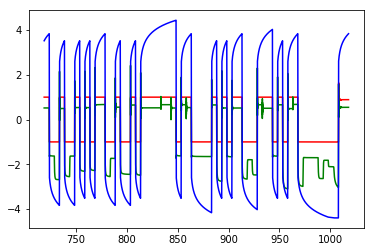

In [65]:
lastn = -30*1000
#lastn = 0
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,0], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,0], 'b');

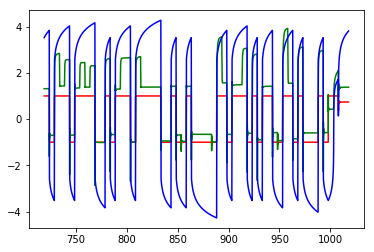

In [66]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].v_history)[lastn:,1], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].v_history)[lastn:,1], 'g',
         np.array(net.t_history[lastn:]), np.array(net.layers[2].v_history)[lastn:,1], 'b');

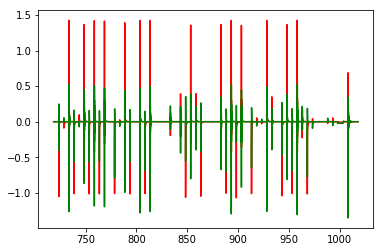

In [67]:
plt.plot(np.array(net.t_history[lastn:]), np.array(net.layers[0].e_history)[lastn:,0], 'r',
         np.array(net.t_history[lastn:]), np.array(net.layers[1].e_history)[lastn:,0], 'g');
#plt.ylim([-0.01,0.01])

In [68]:
net.ShowState()
net.ShowWeights()

Layer 0 (input):
  v = [0.88805354 0.7381894 ]
  e = [-2.6373348e-06 -2.2764664e-06]
Layer 1:
  v = [0.5457668 1.3791565]
  e = [-3.7333034e-06 -6.5643098e-06]
Layer 2 (expectation):
  v = [3.8354976 3.807777 ]
  W01 = 
[[ 1.5064045 -0.5265158]
 [-0.9277537  1.5477177]]
  M10 = 
[[0.9889556  0.02970962]
 [0.10419815 0.8805592 ]]
  W12 = 
[[ 1.3515146  -0.18824956]
 [-0.77605057  0.56200397]]
  M21 = 
[[ 0.74745405 -0.02392265]
 [-0.05960605  0.7641752 ]]


In [69]:
# Test the feedback (generative) performance
beta = 0. # 1 for FF, 0 for FB
inf_layer = -1 if beta==1 else 0
n_trials = 20
x_true = []
x_est = []
T = 10.
for trial in range(n_trials):
    [x, y] = RandomSample()
    if beta==1:
        x_true.append(np.array(y))
        y = net.Predict(T, x)
        x_est.append(np.array(y))
    else:
        x_true.append(np.array(x))
        x = net.Generate(T, y)
        x_est.append(np.array(x))
x_true = np.array(x_true)
x_est = np.array(x_est)

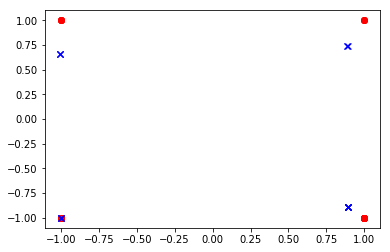

In [70]:
plt.plot(x_true[:,0], x_true[:,1], 'ro', x_est[:,0], x_est[:,1], 'bx');